In [12]:
%matplotlib inline
import numpy as np
from pyquante2 import *
from pyquante2.scf.iterators import AveragingIterator
import matplotlib.pyplot as plt

In [3]:
def n2_mol(R): return molecule([(7,0,0,-R/2),(7,0,0,R/2)],units='Angstrom')
def get_n2_energy(R,**kwargs): return get_energy(n2_mol(R),**kwargs)

def get_energy(geo,basis='sto3g',returnall=False):
    bfs = basisset(geo,basis)
    solver = rhf(geo,bfs)
    ens = solver.converge()
    if returnall: return ens
    return ens[-1]

In [4]:
Rs = [0.9,0.95,0.975,1.0,1.025,1.05,1.1]
Es = []
for R in Rs:
    n2 = molecule([(7,0,0,-R/2),(7,0,0,R/2)],units='Angstrom')
    bfs = basisset(n2,'sto3g')
    solver = rhf(n2,bfs)
    #ens = solver.converge(AveragingIterator,maxiters=100)
    ens = solver.converge()
    Es.append(solver.energy)
    print( "%.3f %.3f" % (R,solver.energy))

0.900 -107.187
0.950 -107.329
0.975 -107.380
1.000 -107.420
1.025 -107.450
1.050 -106.680
1.100 -106.770


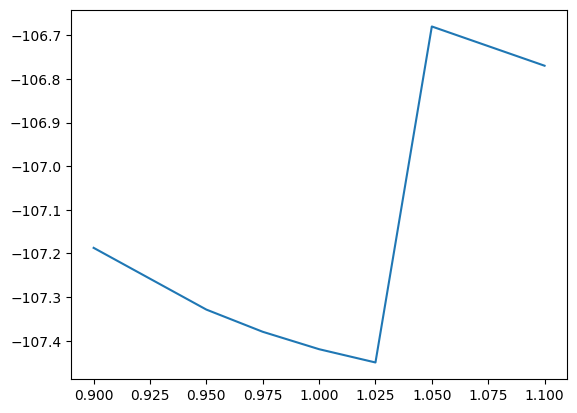

In [13]:
plt.plot(Rs,Es)

In [14]:
get_n2_energy(1.025,returnall=True)

[-103.69380801661738,
 -107.42054442138181,
 -107.44869965555363,
 -107.4499133337343,
 -107.44996793409055]

In [15]:
get_n2_energy(1.05,returnall=True)

[-103.84150710154368,
 -106.65557209854862,
 -106.6789097693994,
 -106.6796800422387,
 -106.6797129855164]

The convergence of the SCF steps, as shown in the above two examples, is monotonic and well-behaved, and is thus *not* the problem we're seeing here.

In [16]:
Enukes = [n2_mol(R).nuclear_repulsion() for R in Rs]

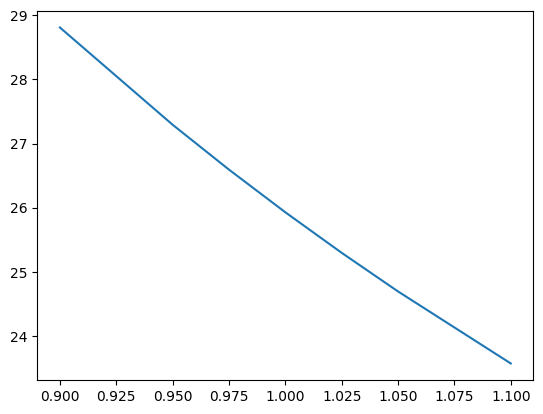

In [17]:
plt.plot(Rs,Enukes)

In [18]:
from pyquante2.scf.mcscf import gvb

----GVB calculation on N2 at R=0.900
**** PyQuante GVB ****
Stoichiometry = N2, Charge = 0, Multiplicity = 1
7 N     0.000000     0.000000    -0.850377
7 N     0.000000     0.000000     0.850377
Nuclear repulsion energy: 28.811
Basis set: sto3g
  ncore/open/pair: 7,0,0
  occ/bf/orb: 7,10,10
Shell 0
  occupation = 1.00
  orbitals in shell range(0, 7)
  couplings to other shells <zip object at 0x113854600>
Starting guess at orbitals:
[[ -7.0780e-01  -7.0841e-01   1.5671e-01  -9.9419e-17   7.1486e-16
    1.5457e-01  -2.4190e-16  -6.1320e-16   9.9153e-02  -8.2175e-02]
 [  4.6782e-03   2.6677e-03  -2.7894e-01  -4.1537e-16  -9.4746e-15
   -2.2505e+00   2.3735e-15   9.5593e-15  -5.5206e-01  -4.3456e-01]
 [  1.1085e-16  -1.1085e-16  -8.5437e-16  -5.2231e-01   2.8843e-01
    3.0997e-16  -5.7806e-01   7.1096e-01   3.3153e-15   2.1356e-15]
 [  5.5385e-17  -5.5385e-17  -2.1263e-16   2.8843e-01   5.2231e-01
    7.6137e-16   7.1096e-01   5.7806e-01   9.3765e-16   6.4995e-17]
 [ -5.0058e-03  -6.0813e

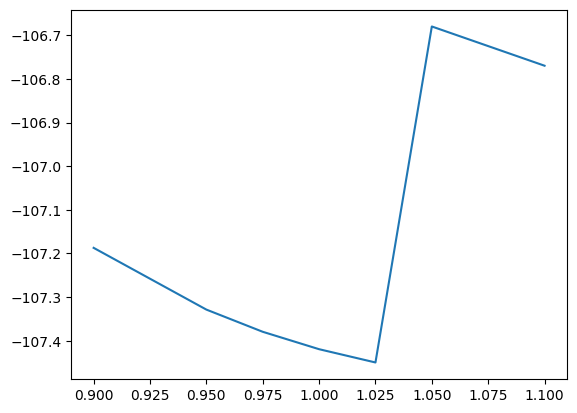

In [19]:
Egvbs = []
for R in Rs:
    n2 = n2_mol(R)
    print( "----GVB calculation on N2 at R=%.3f" % R)
    E = gvb(n2,verbose=True)
    Egvbs.append(E)
plt.plot(Rs,Egvbs)

In [25]:
# R     Etot        Enuke     Eone        Etwo
data = """\
0.900  -107.1872    28.8108  -100.3571    64.7162
0.950  -107.3287    27.2944   -99.2035    63.7838
0.975  -107.3796    26.5945   -98.6566    63.3390
1.000  -107.4195    25.9297   -98.1287    62.9081
1.025  -107.4500    25.2973   -97.6190    62.4907
1.050  -106.6797    24.6949   -97.0996    62.8246
1.100  -106.7696    23.5724   -96.1638    61.9856"""
Edata = []
for line in data.splitlines():
    Edata.append([float(word) for word in line.split()])
Edata = np.array(Edata)

In [26]:
Edata

array([[   0.9   , -107.1872,   28.8108, -100.3571,   64.7162],
       [   0.95  , -107.3287,   27.2944,  -99.2035,   63.7838],
       [   0.975 , -107.3796,   26.5945,  -98.6566,   63.339 ],
       [   1.    , -107.4195,   25.9297,  -98.1287,   62.9081],
       [   1.025 , -107.45  ,   25.2973,  -97.619 ,   62.4907],
       [   1.05  , -106.6797,   24.6949,  -97.0996,   62.8246],
       [   1.1   , -106.7696,   23.5724,  -96.1638,   61.9856]])

Text(0.5, 0, 'R')

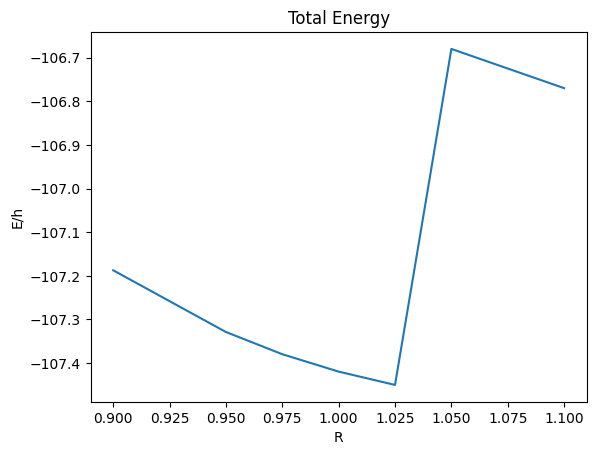

In [27]:
plt.plot(Edata[:,0],Edata[:,1])
plt.title("Total Energy")
plt.ylabel("E/h")
plt.xlabel("R")

Text(0.5, 0, 'R')

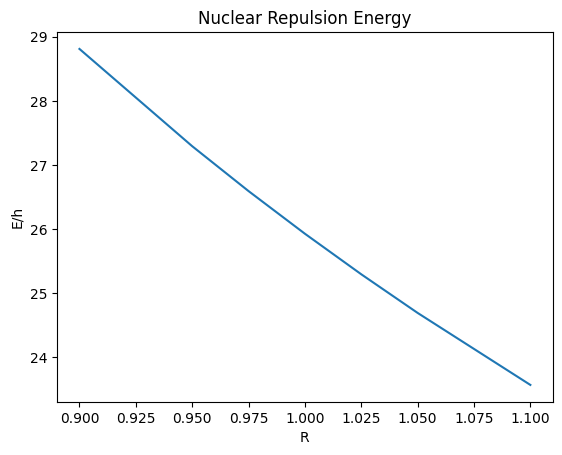

In [28]:
plt.plot(Edata[:,0],Edata[:,2])
plt.title("Nuclear Repulsion Energy")
plt.ylabel("E/h")
plt.xlabel("R")

Text(0.5, 0, 'R')

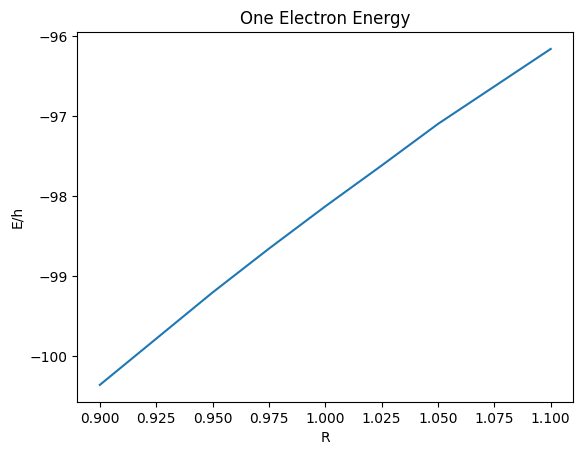

In [29]:
plt.plot(Edata[:,0],Edata[:,3])
plt.title("One Electron Energy")
plt.ylabel("E/h")
plt.xlabel("R")

Text(0.5, 0, 'R')

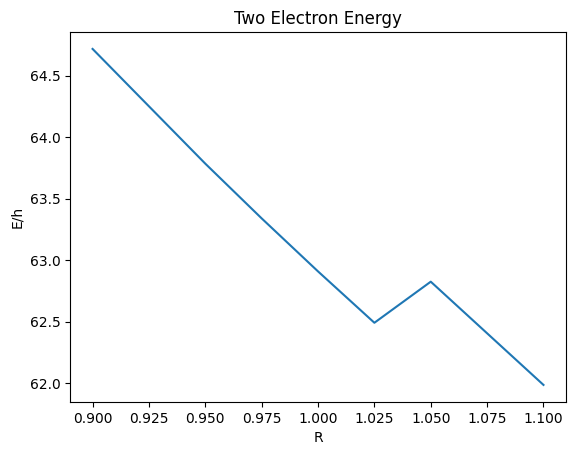

In [30]:
plt.plot(Edata[:,0],Edata[:,4])
plt.title("Two Electron Energy")
plt.ylabel("E/h")
plt.xlabel("R")

# Analysis of individual two-electron terms

In [31]:
len(bfs)

10

In [32]:
L1s,L2s,Lx,Ly,Lz,R1s,R2s,Rx,Ry,Rz = bfs

In [33]:
from pyquante2.ints.two import ERI

In [34]:
Es = []
for R in Rs:
    n2 = molecule([(7,0,0,-R/2),(7,0,0,R/2)],units='Angstrom')
    bfs = basisset(n2,'sto3g')
    L1s,L2s,Lx,Ly,Lz,R1s,R2s,Rx,Ry,Rz = bfs
    Es.append([ERI(i,i,i,i) for i in bfs])
Es = np.array(Es)

Text(0.5, 1.0, 'One-center two-electron integral terms')

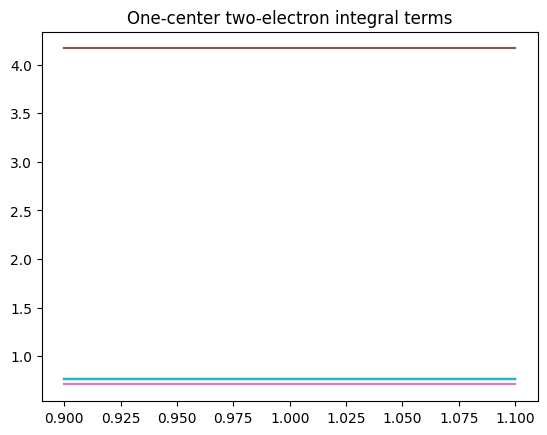

In [35]:
for i in range(len(bfs)):
    plt.plot(Rs,Es[:,i])
plt.title("One-center two-electron integral terms")

The above cell shows that the problem isn't the one-center integrals.

In [36]:
Es = []
for R in Rs:
    n2 = molecule([(7,0,0,-R/2),(7,0,0,R/2)],units='Angstrom')
    bfs = basisset(n2,'sto3g')
    cross_integrals = []
    Es.append(cross_integrals)
    for i in bfs[:5]:
        for j in bfs[5:]:
            cross_integrals.append(ERI(i,i,j,j))
    #L1s,L2s,Lx,Ly,Lz,R1s,R2s,Rx,Ry,Rz = bfs
Es = np.array(Es)

Text(0.5, 1.0, 'Two-center coulomb integral terms')

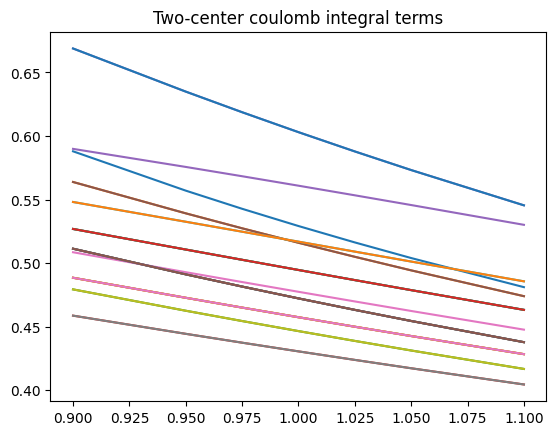

In [37]:
for i in range(25):
    plt.plot(Rs,Es[:,i])
plt.title("Two-center coulomb integral terms")

It also doesn't appear that the J12 integrals are the problem.

In [38]:
Es = []
for R in Rs:
    n2 = molecule([(7,0,0,-R/2),(7,0,0,R/2)],units='Angstrom')
    bfs = basisset(n2,'sto3g')
    cross_integrals = []
    Es.append(cross_integrals)
    for i in bfs[:5]:
        for j in bfs[5:]:
            cross_integrals.append(ERI(i,j,i,j))
    #L1s,L2s,Lx,Ly,Lz,R1s,R2s,Rx,Ry,Rz = bfs
Es = np.array(Es)

Text(0.5, 1.0, 'Two-center exchange integral terms')

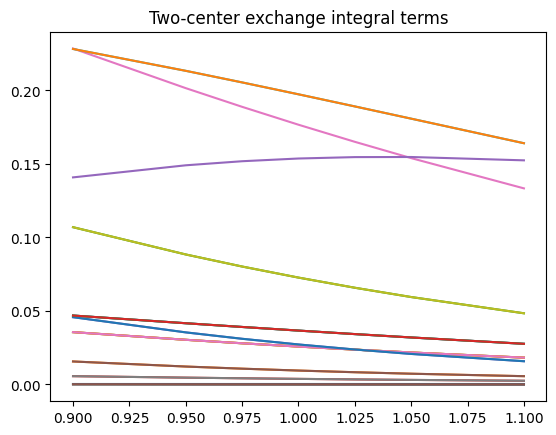

In [39]:
for i in range(25):
    plt.plot(Rs,Es[:,i])
plt.title("Two-center exchange integral terms")

Also does not appear that the exchange integrals are the problem.

I could go on analyzing contributions, but it's unlikely that they make major contributions at this point. Maybe the problem isn't in the integrals themselves, but in the way I'm building the energy out of the integrals.

# Using an explicit SCF cycle:

In [40]:
def rhf_simple(geo,basisname='sto3g',maxiter=25,verbose=False,guess=None):
    bfs = basisset(geo,basisname)
    i1 = onee_integrals(bfs,geo)
    i2 = twoe_integrals(bfs)
    if verbose: print ("S=\n%s" % i1.S)
    h = i1.T + i1.V
    if verbose: print ("h=\n%s" % h)
    if verbose: print ("T=\n%s" % i1.T)
    if verbose: print ("V=\n%s" % i1.V)
    if guess is None:
        E,U = geigh(h,i1.S)
    else:
        U = guess
    if verbose: print ("E=\n%s" % E)
    if verbose: print ("U=\n%s" % U)
    Enuke = geo.nuclear_repulsion()
    nocc = geo.nocc()
    Eold = Energy = 0
    if verbose: print ("2e ints\n%s" % i2)
    for i in xrange(maxiter):
        D = dmat(U,nocc)
        if verbose: print ("D=\n%s" % D)
        Eone = trace2(h,D)
        G = i2.get_2jk(D)
        H = h+G
        Etwo = trace2(H,D)
        E,U = geigh(H,i1.S)
        Energy = Enuke+Eone+Etwo
        if verbose: print ("HF: %d   %10.4f : %10.4f %10.4f %10.4f" % ((i+1),Energy,Enuke,Eone,Etwo))
        if np.isclose(Energy,Eold):
            break
        Eold = Energy
    else:
        print ("Warning: Maxiter %d hit in scf_simple" % maxiter)
    return Energy,E,U,Eone,Etwo,Enuke

In [ ]:
Rs = [1.0,1.025,1.05,1.1]
Eterms = []
U = None
for R in Rs:
    print( "Running R=%f ..." % R)
    n2 = molecule([(7,0,0,-R/2),(7,0,0,R/2)],units='Angstrom')
    bfs = basisset(n2,'sto3g')
    # Run, passing in the previous solution as the input guess
    Energy,E,U,Eone,Etwo,Enuke = rhf_simple(n2,guess=U)
    Eterms.append((Energy,Eone,Etwo,Enuke))
    print( " E=%f" % Energy)
Eterms = np.array(Eterms)


SyntaxError: Missing parentheses in call to 'print'. Did you mean print(...)? (4028663278.py, line 5)

In [42]:
plt.plot(Rs,Eterms[:,0])

NameError: name 'Eterms' is not defined